Name: Artur Sak

NetID: (sak2)

### Introduction

In this lab, we will investigate two highly useful features for image analysis: color histogram and HOG. Both of these features are widely used in computer vision and image analysis problems of all kinds, such as face recognition, similar image search, image classification, and object detection.

If you are using SageMathCloud, opencv and tensorflow are already installed, you can skip this note.

## Notes on OpenCV

Depending on the OS you are using there might be different instructions on how to build and install OpenCV with Python. We will be using OpenCV 3.1.0 for this lab. Older versions should work as well, but you might have to change some lines of code. Depending on your comfort level, you may choose either pathway.

Make sure to at least get OpenCV working before you leave the lab today. Search online for how to install OpenCV on your OS. Installing from prebuilt binaries are recommended. If you installed successfully, you can run 

\>>> import cv2

\>>> print cv2.\__version\__

**DO NOT SUBMIT ANY OpenCV files.**

# Part 1. Color Histogram

For image analysis, much of the information of an image can be conveyed merely by its histogram, although other, more sophisticated features, such as SIFT, are often used and needed in big data problems. Here, we'll investigate how useful the histogram can be. For this section, you will need to download the Caltech-101 dataset (http://www.vision.caltech.edu/Image_Datasets/Caltech101/). This dataset contains 101 different object categories, each with between 40 to 800 images of size 300 x 200, roughly. (This dataset pales in comparison to other modern, "big data" image datasets, but it's the best that your computer can likely handle easily.)

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

First, we'll look at three test-case images.

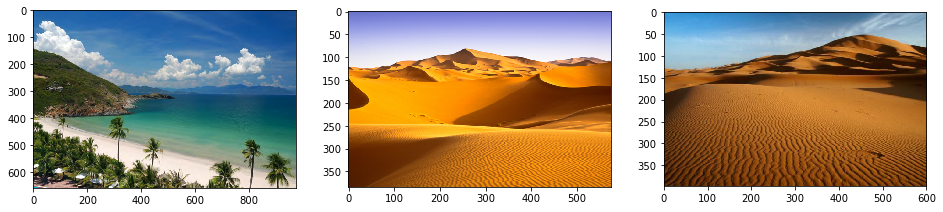

In [2]:
beach = misc.imread('beach.png')
desert1 = misc.imread('desert1.jpg')
desert2 = misc.imread('desert2.jpg')

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(beach)
plt.subplot(1,3,2)
plt.imshow(desert1)
plt.subplot(1,3,3)
plt.imshow(desert2)

We provide the following two functions to generate and compare histograms. They are built upon OpenCV's implementation [compareHist](http://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html). We use the CV_COMP_INTERSECT method. 
The image has three channels, the comparison results are stored in x1, x2 and x3. And Euclidean distance is used to give a single output number **comp**. 

##### This function is used to compare two histograms using the histogram intersection

In [3]:
# h1, h2 - input histograms to compare, which should be of dimension (3,N) for color images and (1,N) for
#              grayscale images. If the two histograms are not the same dimensions, the output is a large
#              value to enforce their disimilarity

def compHist(h1, h2):
    if h1.shape[0] != h2.shape[0]:
        return 100
    else:
        x1 = cv2.compareHist(h1[0,:].astype('float32'), h2[0,:].astype('float32'), 2)
        x2 = cv2.compareHist(h1[1,:].astype('float32'), h2[1,:].astype('float32'), 2)
        x3 = cv2.compareHist(h1[2,:].astype('float32'), h2[2,:].astype('float32'), 2)
        comp = np.sqrt(x1**2 + x2**2 + x3**2)
        return comp

##### This function is used to generate a histogram from an input image.  Notice how we normalize the histogram by dividing by the total pixels in the image. 

In [4]:
# img - the input image
# n_bins - the number of bins of the output histogram
# returns: h - the histogram

def generateHist(img, n_bins):
    k = len(img.shape)
    
    if k == 2:
        h = np.zeros((1,n_bins),dtype='float32')
        M,N = img.shape
        h[0,:][:, np.newaxis] = cv2.calcHist([img], [0], None, [n_bins], [0,256])
        h = h/(M*N)
    else:
        h = np.zeros((3,n_bins),dtype='float32')
        M,N,D = img.shape
        h[0,:][:, np.newaxis] = cv2.calcHist([img], [0], None, [n_bins], [0,256])
        h[1,:][:, np.newaxis] = cv2.calcHist([img], [1], None, [n_bins], [0,256])
        h[2,:][:, np.newaxis] = cv2.calcHist([img], [2], None, [n_bins], [0,256])
        h = h/(M*N)
        
    return h

Now, let's use the above functions to generate histograms for the three test-cases.

In [5]:
n_bins = 100

hist_desert1 = generateHist(desert1, n_bins)
hist_desert2 = generateHist(desert2, n_bins)
hist_beach = generateHist(beach, n_bins)

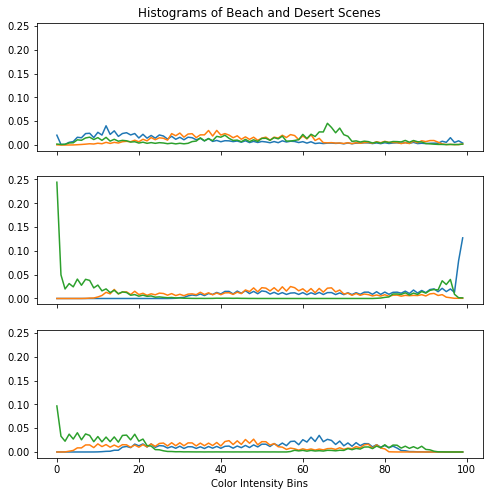

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches((8,8))
ax1.plot(hist_beach[0,:])
ax1.plot(hist_beach[1,:])
ax1.plot(hist_beach[2,:])
ax1.set_title('Histograms of Beach and Desert Scenes')

ax2.plot(hist_desert1[0,:])
ax2.plot(hist_desert1[1,:])
ax2.plot(hist_desert1[2,:])

ax3.plot(hist_desert2[0,:])
ax3.plot(hist_desert2[1,:])
ax3.plot(hist_desert2[2,:])
ax3.set_xlabel('Color Intensity Bins')

Using the method=CV_COMP_INTERSECT interesction as a comparison metric, we compare how "similar" are the histograms. Which two images are the most similar? (Remember that this metric is a distance, so smaller values mean more "similar".)

In [7]:
print 'Beach vs. Desert1:\t' + str(compHist(hist_beach, hist_desert1)) # beach vs. desert1
print 'Desert2 vs. Desert1:\t' + str(compHist(hist_desert2, hist_desert1)) # desert2 vs. desert1
print 'Beach vs. Desert2:\t' + str(compHist(hist_beach, hist_desert2)) # beach vs. desert2

Beach vs. Desert1:	0.900490876057
Desert2 vs. Desert1:	1.09540549642
Beach vs. Desert2:	0.969547004085


### Exercise 1:

a. Write your own implementation of the histogram. It should take in an image and a parameter called "n_bins," which is the number of bins for the histogram. (In an image, pixel values range from 0 - 255, but the histogram could have fewer than 255 bins. If, for instance, n_bins = 100, then each bin of the histogram would store between 2-3 different pixel intensity values.) 

For grayscale images, the output will be a 1D vector of dimension (1, n_bins). For color images, compute a 1D histogram of each channel with n_bins and form the three histograms into a 2D matrix of dimension (3, n_bins). The histogram should also be normalized by the total number of pixels, so that along each row it sums to 1. 

**You are NOT allowed to use any OpenCV or third party libraries.** 

In [8]:
def MygenerateHist(image, n_bins):
  
    if len(image.shape) != 3:
        hist = np.zeros((1,n_bins),dtype='float32')
        M,N = image.shape
        step = 256./n_bins
        prev_intensity = 0.
        
        for i in range(n_bins):
            intensity = ((i + 1) * step)
            hist[:, i] = np.logical_and((image[:,:] >= prev_intensity),(image[:,:] < intensity)).sum()
            prev_intensity = intensity
    else:
        hist = np.zeros((3,n_bins),dtype='float32')
        M,N,D = image.shape
    
        step = 256./n_bins
        one_channel = np.zeros_like(image, dtype="float32")

        for channel in range(0,min(hist.shape[0],3)):
            one_channel[:,:,channel] = image[:,:,channel]
            channel_vect = one_channel[:,:,channel].ravel()
            prev_intensity = 0.
            for i in range(n_bins):
                intensity = ((i + 1) * step)
                hist[channel, i] = np.logical_and((channel_vect >= prev_intensity),(channel_vect < intensity)).sum()
                prev_intensity = intensity
            one_channel[:,:,channel] = 0.

    return hist/(M*N)

b. Write your own implementation of the histogram comparing. See the formula in the Intersection (method=CV_COMP_INTERSECT) OpenCV for how to implement the histogram intersection. 

**You are NOT allowed to use any OpenCV or third party libraries.** 

In [9]:
# min_matrix = np.where(h1 >= h2, h2, 0) + np.where(h1 < h2, h1, 0)
# the_min = min_matrix / float(min(np.sum(h1.ravel()), np.sum(h2.ravel())))
# return np.sqrt(np.sum(np.square(the_min.ravel())))

def MycompHist(h1, h2):
    if h1.shape[0] != h2.shape[0]:
        return 100
    else:
        lst = np.zeros(3,dtype="float32")
        for channel in range(0,3):
            lst[channel] = np.minimum(h1[channel,:].astype('float32'), h2[channel,:].astype('float32')).sum()
        lst = np.array(map(lambda x: x**2, lst))
        return np.sqrt(lst.sum())

c. Testing your functions using the following code. 

In [10]:
nbins = 100

hist_desert1 = MygenerateHist(desert1, nbins)
hist_desert2 = MygenerateHist(desert2, nbins)
hist_beach = MygenerateHist(beach, nbins)

print 'Beach vs. Desert1:\t' + str(MycompHist(hist_beach, hist_desert1)) # beach vs. desert1
print 'Desert2 vs. Desert1:\t' + str(MycompHist(hist_desert2, hist_desert1)) # desert2 vs. desert1
print 'Beach vs. Desert2:\t' + str(MycompHist(hist_beach, hist_desert2)) # beach vs. desert2

Beach vs. Desert1:	0.900490875429
Desert2 vs. Desert1:	1.09540555584
Beach vs. Desert2:	0.969547026276


# Part 2: Similar Image Search by Histogram Matching

**In the news**: Flickr and Pinterest rolled out update last week (March 7th, 2017) to allow users to search for images based on visual similarity. Flickr in their blog post says it uses deep neural networks to analyze the photos as they are uploaded to the server. 

In this lab, using the histogram as a feature for our image, let's see how well it works when searching for similar images in a large dataset. You will need to import the lab5.py file, as done below, to use a function to load the Caltech-101 dataset. You can download from [here](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) and unzipped this dataset to the same directory as your notebook. It should be in a folder called '101_ObjectCategories.'

In [11]:
import lab5

dataset_dir = '101_ObjectCategories/'

n_images, classes, image_names = lab5.load_image_dataset(dataset_dir)

The following code generates histograms for all of the images in the dataset.

In [12]:
hists = []

n_bins = 100

for name in image_names:
    temp_image = misc.imread(name)
    temp_hist = generateHist(temp_image, n_bins)
    hists.append(temp_hist)

Here are the four test query images that we will use to search for similar images. Notice the diversity in their histograms.

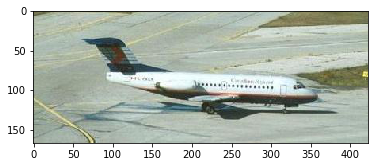

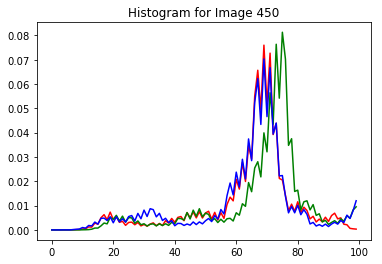

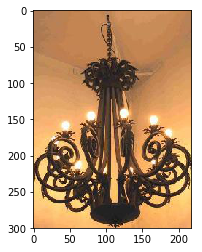

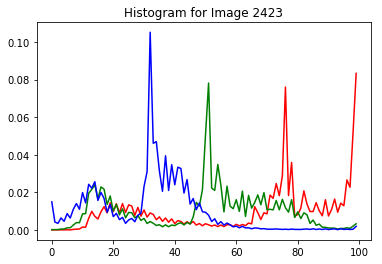

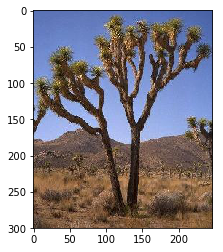

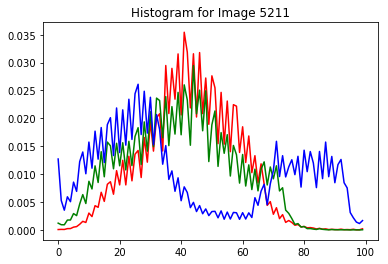

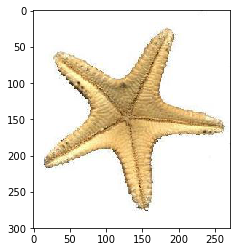

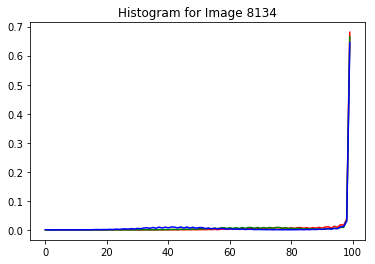

In [13]:
# Compare a test histogram to the database
test_ind = [450, 2423, 5211, 8134]
n_bins = 100

for i in test_ind:
    test = misc.imread(image_names[i])
    plt.figure()
    plt.imshow(test)

    test_hist = generateHist(test, n_bins)

    plt.figure()
    plt.plot(test_hist[0,:], color='red')
    plt.plot(test_hist[1,:], color='green')
    plt.plot(test_hist[2,:], color='blue')
    plt.title('Histogram for Image ' + str(i))

### Exercise 2 Finding similar images

The code below iterates through the above test query images and searches for their 10 most similar images (K is the number of similar images in the code). Fill in the missing elements to generate the histograms and compare them using your own histogram implementation from Exercise 1. The number of bins for the histogram should be n_bins = 100.

The images will be stored in a directory called "closest" in the same location as your notebook. They will have suffixes denoting which of the four images they match and their order in terms of similarity. (Note that the first image should be the query image itself, since it is still in the dataset and is more similar to itself than any other image). Submit this folder with your notebook for the lab.

Do the results look reasonable? Explain why or why not.

##### Documentation on [argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html)

In [14]:
import os

closest_dir = 'closest/'
if not os.path.exists(closest_dir):
    os.makedirs(closest_dir)

n_bins = 100
K = 10
    
for ind in test_ind:
    print 'Finding closest ' + str(K) + ' images to ' + image_names[ind]
    test = misc.imread(image_names[ind])
    
    test_hist = MygenerateHist(test,n_bins)

    D = np.zeros(n_images)
    for i in range(n_images):
        D[i] =  MycompHist(hists[i], test_hist)
    idx = np.argsort(D)
    
    closest = []
    for i in range(K):
        closest.append(image_names[idx[i]])
        img = misc.imread(closest[i])
        misc.imsave(closest_dir + 'closest_' + str(ind) + '_' + str(i) + '.jpg', img)
        print '\tSaving closest image: ' + image_names[idx[i]]

Finding closest 10 images to 101_ObjectCategories/airplanes/image_0396.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0003.jpg
	Saving closest image: 101_ObjectCategories/umbrella/image_0060.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0117.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0241.jpg
	Saving closest image: 101_ObjectCategories/soccer_ball/image_0025.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0142.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0125.jpg
	Saving closest image: 101_ObjectCategories/yin_yang/image_0001.jpg
	Saving closest image: 101_ObjectCategories/panda/image_0003.jpg
	Saving closest image: 101_ObjectCategories/wrench/image_0005.jpg
Finding closest 10 images to 101_ObjectCategories/chandelier/image_0009.jpg
	Saving closest image: 101_ObjectCategories/BACKGROUND_Google/image_0003.jpg
	Saving closest image: 101_ObjectCategories/wrenc

Your answer (within 2 lines): 

# Part 3 Histogram of Oriented Gradients

We will learn the details of the Histogram of Oriented Gradients (HOG) feature descriptor. You are strongly encouraged to read this blog first: http://www.learnopencv.com/histogram-of-oriented-gradients/. It contains the details of the implementations. First, let's see the HOG feature by OpenCV. 

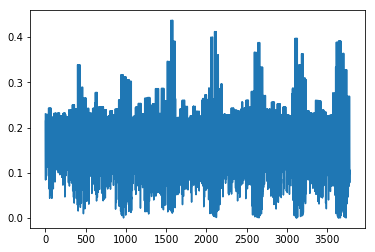

In [6]:
hog = cv2.HOGDescriptor()
im = cv2.imread('Duncan.jpg')

h = hog.compute(im)  # HoG feature by OpenCV
plt.plot(h)

im = np.fliplr(im.reshape(-1,3)).reshape(im.shape)  #convert BGR to RGB

Now we are going to calculate the HOG feature of the above image patch by ourself. You are allowed to use OpenCV functions but are not allowed to call HOG descriptor directly. 

**Step 1**: Calculate the Gradient Images. After we obtained the gradients the RGB channels, we just pick the channel with the strongest gradient magnitude. After this step, you should get the magnitude and direction of the gradient for each pixel, both of which are a 128\*64 matrix. 

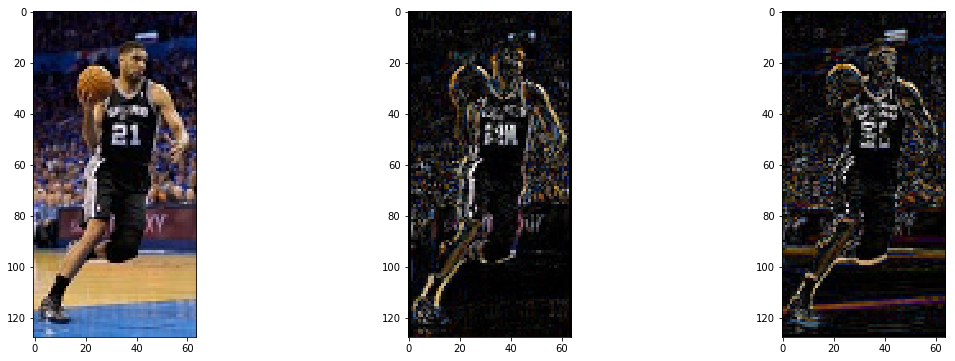

In [16]:
im = np.float32(im)/255.0
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

#plot the X and Y gradients.
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(np.abs(gx))
plt.subplot(1,3,3)
plt.imshow(np.abs(gy))

# Python Calculate gradient magnitude and direction ( in degrees ) 
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

### Exercise 3:

Pick the channel with the strongest gradient magnitude for each pixel. Convert the degree from [0,360] to [0,180] by ignoring the sign of the gradient direction.

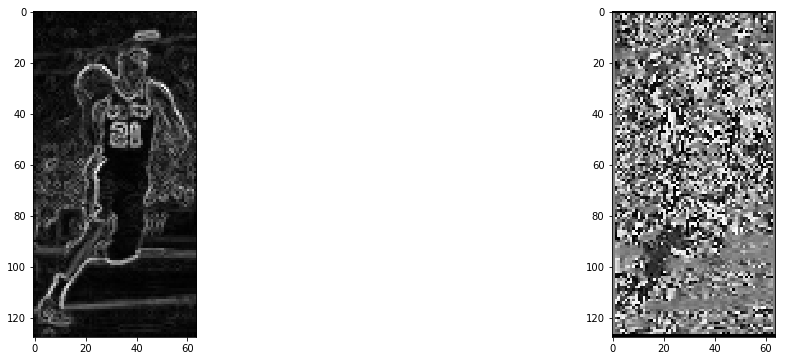

In [22]:
def max_channel_mask(a): # For getting the maximum pixels' mask from a 3D image
    z = np.zeros(a.shape[:2])
    comparator = np.expand_dims(np.argmax(a, axis=2), axis=2)
    mask = (np.stack([z, z+1, z+2], axis=2) == comparator)
    return mask

mask = max_channel_mask(mag)

grador = (angle*mask).sum(axis=2) % 180
gradmag = (mag* mask).sum(axis=2)

#plot your result
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.imshow(gradmag, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(grador, cmap='gray')

### Exercise 4:

**Step 2**: Calculate Histogram of Gradients in 8×8 cells.

In this step, the image is divided into 8×8 cells and a histogram of gradients is calculated for each 8×8 cells. We create 9 bins, i.e. [0,20,40,60,80,100,120,140,160]. You will need to add the magnitude to the corresponding bin based on the direction. You should use interpolation. For example, 30 degree should be divided into half in 20 and half in 40. After this step, we should get 8\*16 cells, and each cell has a histogram of gradients with 9 bins.   

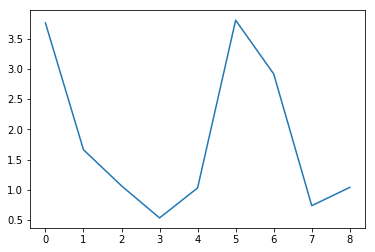

In [23]:
cell_size = 8
nbins = 9

nH= im.shape[0]/cell_size 
nW = im.shape[1]/cell_size

bins = np.linspace(0,160,nbins)

hist_img = np.tile(bins,[im.shape[0],im.shape[1],1])
bin_width = bins[1]-bins[0]

mags = np.expand_dims(gradmag, axis=2)
ors = np.expand_dims(grador, axis=2)
mask = abs(ors - hist_img) < bin_width
hist_img = mask*mags*(1 - abs(ors - hist_img)/bin_width)

raw_hog = np.zeros((nH,nW,nbins),dtype=np.float32)   # define the histogram of gradients 
for row in np.arange(0,im.shape[0],cell_size):
    for col in np.arange(0,im.shape[1],cell_size):
        cell_pixels = hist_img[row:row+cell_size, col:col+cell_size, :]
        raw_hog[int(row/cell_size), int(col/cell_size), :] = np.tensordot(cell_pixels, np.ones([cell_size, cell_size, 1]),
                                                                     axes=((0, 1), (0, 1))).squeeze()

# plot this cell for the TA to check correctness.         
plt.plot(raw_hog[5,5,:])

### Exercise 5:

**Step 3**: Block Normalization

In this step, we will need to normlize the HOG features in every 16\*16 blocks, which is every 4 cells. In each block there will be a 36\*1 feature vector, which is normalized by its L2 norm. The window is then moved by 1 cell. So finally, we will have the 7\*15 blocks with normalized features. We reshape them into one vector.  

In [24]:
hog = np.zeros((nH-1,nW-1,nbins*4), dtype=np.float32)

for i in range(nH-1):
    for j in range(nW-1):
        block = raw_hog[i:(i+2),j:(j+2),:].reshape((1,1,36))
        block_descriptor = block/np.linalg.norm(block)
        hog[i:(i+1), j:(j+1),:] = block_descriptor

hog = np.reshape(hog,[-1])

We compare your implementation and the OpenCV implementation. They may not be the same. Think about why.

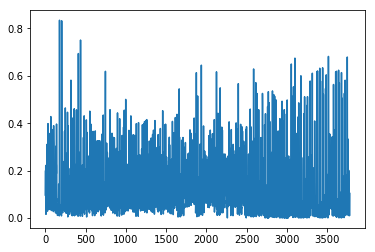

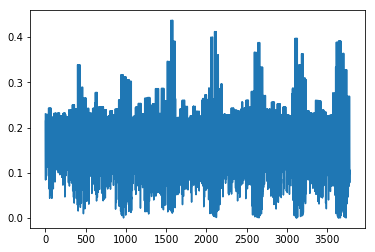

In [25]:
plt.figure()
plt.plot(hog)
plt.figure()
plt.plot(h)

### Exercise 6:  

Extra credit (up to 30 points). Implement a pedestrain detector based on your HOG features. You can download the INRIA Person Dataset for training and testing http://pascal.inrialpes.fr/data/human/. You can train a SVM to classify the neg and pos examples based on their HOG features. Print your test accuracy. And plot 3 images of true detect, 3 images of false detect, and 3 images of miss detect. You can use the OpenCV SVM package directly. 

In [9]:
import glob
from numpy.random import randint
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import hogs

def random_subframes(imgs, rows=128, cols=64, n=1):
    frames = np.zeros([n, rows, cols, 3], dtype='uint8')
    for i in range(0, n):
            img = imgs[randint(0, imgs.shape[0])]
            y_loc = randint(0, img.shape[0] - rows)
            x_loc = randint(0, img.shape[1] - cols)
            frames[i, :, :, :] = img[y_loc:y_loc+rows, x_loc:x_loc+cols, :]
    return frames

pos_fps = glob.glob("INRIAPerson/train_64x128_H96/pos/*")
pos_samples = np.array([misc.imread(img_fp) for img_fp in pos_fps])
pos_labels = [fp.split('\\')[-1] for fp in pos_fps]

neg_fps = glob.glob('INRIAPerson/train_64x128_H96/neg/*')
neg_imgs = np.array([misc.imread(img_fp) for img_fp in neg_fps])
neg_samples = random_subframes(neg_imgs, n=15000)


pos_d = generateHist(pos_samples)
neg_d = generate(neg_samples)
# pos_d = []
# neg_d = []
# for i in range(len(pos_samples)):
#     pos_d.append(hog.compute(pos_samples[i]))
#     neg_d.append(hog.compute(neg_samples[i]))

samples = pd.DataFrame(np.concatenate([pos_d.samples, neg_d.samples]))
responses = pd.Series(np.concatenate([np.ones(len(pos_d.samples)), np.zeros(len(neg_d.samples))]).T)
training_samples, testing_samples, training_responses, testing_responses = train_test_split(samples, responses)

clf = cv2.SVM()
clf.fit(training_samples, training_responses)
predictions = s.predict(testing_samples)

print(classification_report(testing_responses, predictions))


ValueError: operands could not be broadcast together with shapes (160,96,4) (160,96,3) 